In [5]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
height_data_path = Path('/workspaces/nrg_interview_prep/data/height_data.csv')
raw_data_df = pd.read_csv(height_data_path)
raw_data_df.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


### Take a look the the relationships between each independent variable and height - the dependent variable.

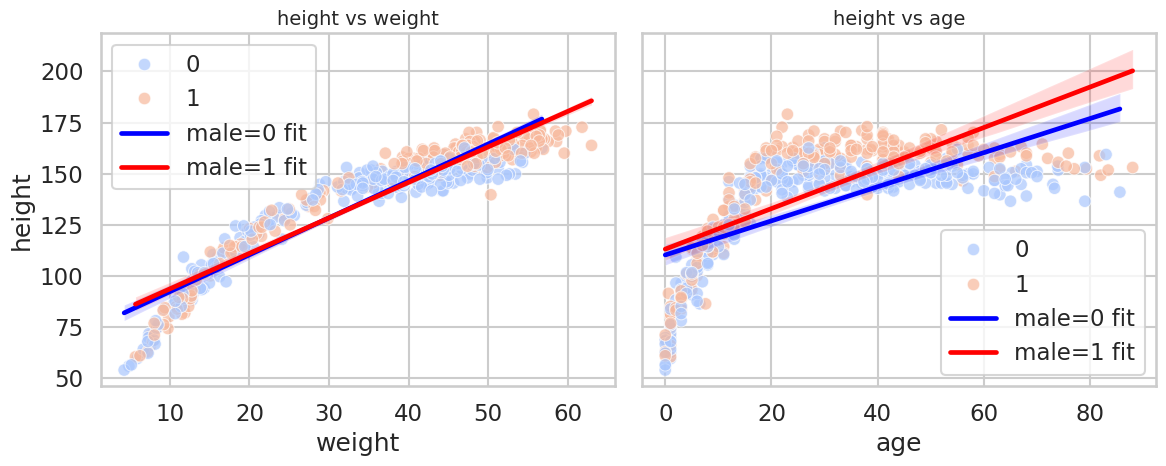

In [3]:
# Set up the plot style
sns.set_theme(style="whitegrid", context="talk")

# Create 1 row, 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# List of independent variables
x_vars = ['weight', 'age']

# Plot each relationship with color-coded binary male vs female labels
for i, x in enumerate(x_vars):
    sns.scatterplot(
        data=raw_data_df,
        x=x,
        y='height',
        hue='male',
        palette='coolwarm',
        alpha=0.7,
        ax=axes[i]
    )

    # Add optional regression lines for each class
    sns.regplot(
        data=raw_data_df[raw_data_df['male'] == 0],
        x=x,
        y='height',
        scatter=False,
        ax=axes[i],
        color='blue',
        label='male=0 fit'
    )
    sns.regplot(
        data=raw_data_df[raw_data_df['male'] == 1],
        x=x,
        y='height',
        scatter=False,
        ax=axes[i],
        color='red',
        label='male=1 fit'
    )

    axes[i].set_title(f'height vs {x}', fontsize=14)
    axes[i].set_xlabel(x)
    axes[i].set_ylabel('height' if i == 0 else '')
    axes[i].legend()

plt.tight_layout()
plt.show()

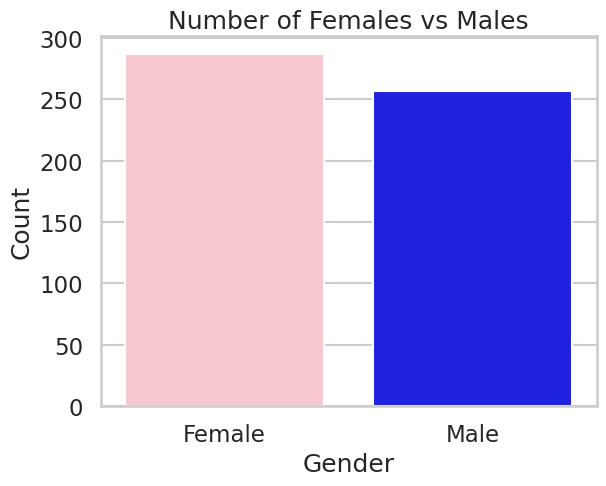

In [4]:
sns.countplot(x='male', hue='male', data=raw_data_df, palette={0:'pink', 1:'blue'}, legend=False)
plt.xticks([0,1], ['Female', 'Male'])
plt.ylabel('Count')
plt.xlabel('Gender')
plt.title('Number of Females vs Males')
plt.show()

In [10]:
import statsmodels.formula.api as smf

# General model ignoring sex
general_model = smf.ols('height ~ weight', data=raw_data_df).fit()
print(general_model.summary())

slope_general = general_model.params['weight']
height_change_per_10_general = 10 * slope_general

print(f"General: For every 10 units of weight, height increases by {height_change_per_10_general:.2f} units.")

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     4177.
Date:                Mon, 27 Oct 2025   Prob (F-statistic):          7.25e-257
Time:                        02:56:06   Log-Likelihood:                -1987.7
No. Observations:                 544   AIC:                             3979.
Df Residuals:                     542   BIC:                             3988.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.4359      1.052     71.725      0.0

In [11]:
# Model with interaction: allows weight effect to differ by gender
gender_model = smf.ols('height ~ weight * male', data=raw_data_df).fit()
print(gender_model.summary())

# Extract coefficients
b_weight = gender_model.params['weight']           # slope for females (male=0)
b_interaction = gender_model.params['weight:male'] # additional slope for males

# Height increase per 10 units of weight
height_change_female = 10 * b_weight
height_change_male = 10 * (b_weight + b_interaction)

print(f"Female: For every 10 units of weight, height increases by {height_change_female:.2f} units.")
print(f"Male:   For every 10 units of weight, height increases by {height_change_male:.2f} units.")



                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1392.
Date:                Mon, 27 Oct 2025   Prob (F-statistic):          1.24e-253
Time:                        02:56:09   Log-Likelihood:                -1986.8
No. Observations:                 544   AIC:                             3982.
Df Residuals:                     540   BIC:                             3999.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      74.2536      1.495     49.659      